In [28]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
activation_path = './GLM/activations/activation_RELATIONAL.pickle'
beta_path = './GLM/betas/betas_RELATIONAL.pickle'
truth_path = './Data/beta_truth/Beta_tfMRI_RELATIONAL_LR_Glasser360.mat'

In [104]:
activation = np.load(activation_path, allow_pickle = True)
beta = np.load(beta_path, allow_pickle = True)
truth = scipy.io.loadmat(truth_path)
truth = truth['Beta']
truth = np.swapaxes(truth, 2, 0)

In [105]:
truth[0,0,:]

array([0.70271307, 0.17983864])

In [106]:
beta.shape

(100, 379, 2)

In [107]:
truth.shape

(100, 379, 2)

In [108]:
beta[0,0,:]

array([0.70271307, 0.17983864])

In [109]:
activation[0,1,:]

array([1., 0.])

In [110]:
m, n, r = beta.shape
arr = np.column_stack((np.repeat(np.arange(m),n),beta.reshape(-1, beta.shape[-1])))
df = pd.DataFrame(arr)
df.rename(columns={df.columns[0]: "subject" }, inplace=True)

In [111]:
df

,subject,1,2
0,0.0,0.702713,0.179839
1,0.0,0.349587,0.039817
2,0.0,0.020800,0.071395
3,0.0,0.779702,0.117847
4,0.0,0.776992,0.130021
...,...,...,...
37895,99.0,-0.194666,-0.020719
37896,99.0,0.200711,0.060480
37897,99.0,0.824249,0.159792
37898,99.0,0.778772,0.192205


<AxesSubplot:>

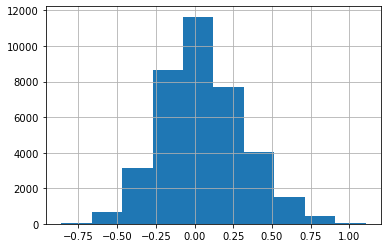

In [112]:
df[1].hist()

In [113]:
m, n, r = truth.shape
arr = np.column_stack((np.repeat(np.arange(m),n),truth.reshape(-1, truth.shape[-1])))
df_t = pd.DataFrame(arr)
df_t.rename(columns={df_t.columns[0]: "subject" }, inplace=True)

In [114]:
df_t

,subject,1,2
0,0.0,0.702713,0.179839
1,0.0,0.349587,0.039817
2,0.0,0.020800,0.071395
3,0.0,0.779702,0.117847
4,0.0,0.776992,0.130021
...,...,...,...
37895,99.0,-0.194666,-0.020719
37896,99.0,0.200711,0.060480
37897,99.0,0.824249,0.159792
37898,99.0,0.778772,0.192205


<AxesSubplot:>

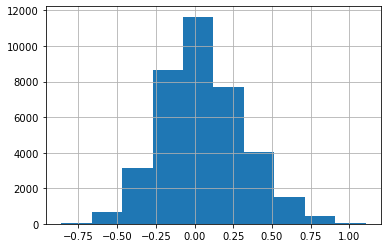

In [115]:
df_t[1].hist()

In [116]:
new = df.merge(df_t, left_index = True, right_index = True)

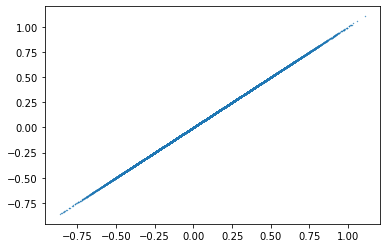

In [117]:
plt.scatter(new['1_x'], new['1_y'], marker = '.', s = .5)

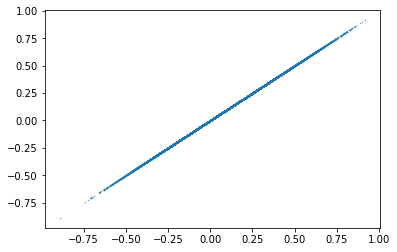

In [118]:
plt.scatter(new['2_x'], new['2_y'], marker = '.', s = .5)

In [119]:
plt.scatter(new['3_x'], new['3_y'], marker = '.', s = .5)

KeyError: '3_x'

In [ ]:
plt.boxplot(df[df['subject'] == 0][1]-df_t[df_t['subject'] == 0][1])
plt.show

In [120]:
df[1].corr(df_t[1])

1.0